In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# 1.Dataset was Downloaded

# 2.Loading the Dataset

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# 3.Performing Visualizations

# Univariate Analysis

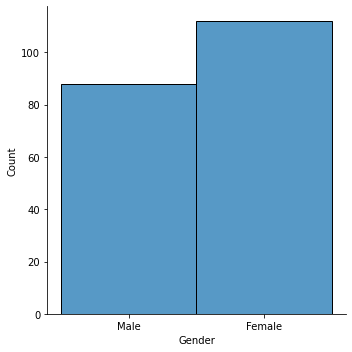

In [5]:
sns.displot(df.Gender)

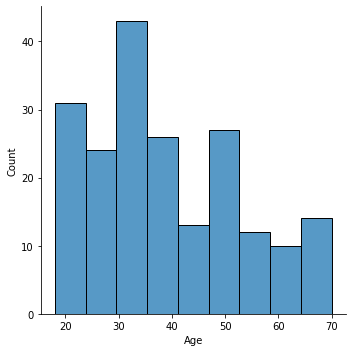

In [6]:
sns.displot(df.Age)

# Bi-Variate Analysis

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Age'>

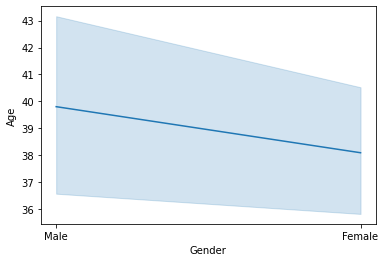

In [7]:
sns.lineplot(df.Gender,df.Age)

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerID', ylabel='Gender'>

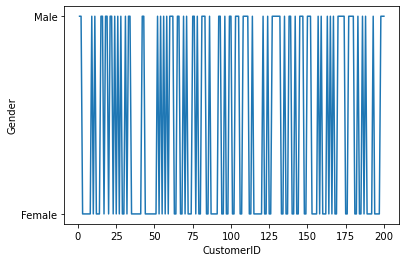

In [8]:
sns.lineplot(df.CustomerID,df.Gender)

# Multi-Variate Analysis

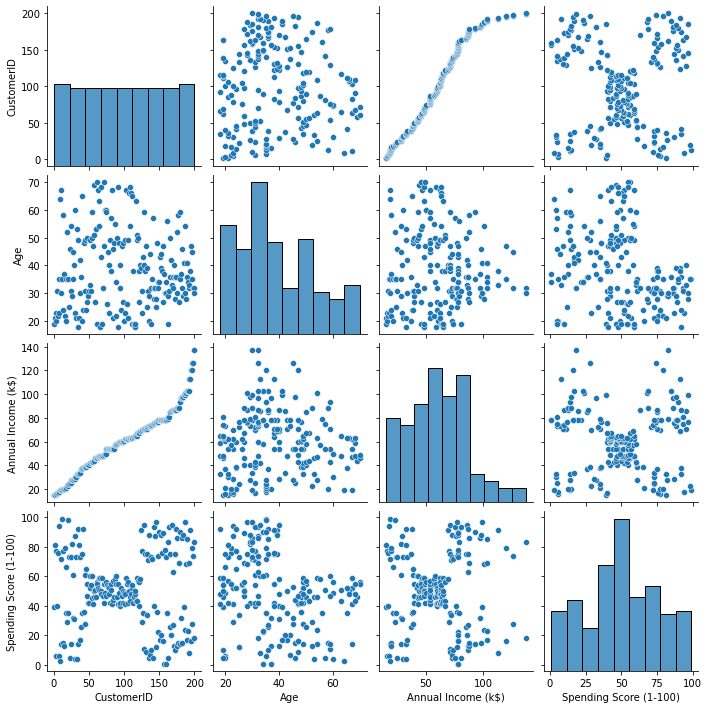

In [9]:
sns.pairplot(df)

# 4.Descriptive Statistics

In [10]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

# 5.Finding Missing Values And Replacing It.

In [11]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [12]:
## There is no any null values in the dataset

# 6.Finding Outliers And Replacing them.

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

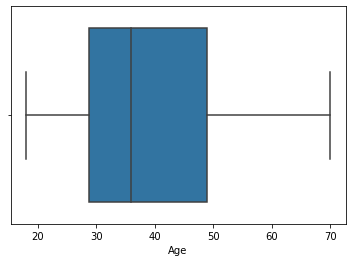

In [13]:
sns.boxplot(df.Age)

In [14]:
## There is no outliers present

# 7.Checking Categorical columns and performing encoding.

In [15]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
df.Gender=le.fit_transform(df.Gender)

In [19]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40

# 8.Scaling the data

In [20]:
from sklearn.preprocessing import scale

In [21]:
X=df

In [22]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

CustomerID    Gender       Age  Annual Income (k$)  Spending Score (1-100)
0   -1.723412  1.128152 -1.424569           -1.738999               -0.434801
1   -1.706091  1.128152 -1.281035           -1.738999                1.195704
2   -1.688771 -0.886405 -1.352802           -1.700830               -1.715913
3   -1.671450 -0.886405 -1.137502           -1.700830                1.040418
4   -1.654129 -0.886405 -0.563369           -1.662660               -0.395980

# 9.Performing Clustering Algorithm.

In [23]:
from sklearn import cluster

In [24]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
error

[975512.0600000003,
 387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157157.7579059829,
 122625.19813553878,
 103233.01724386725,
 86053.67444777445,
 76938.97565600359,
 69231.33607611558]

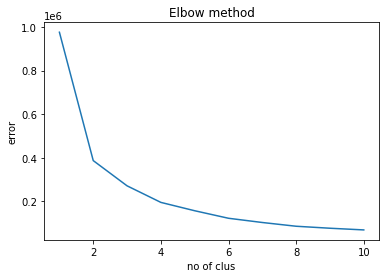

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [27]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [28]:
km_model.fit(df)

KMeans(n_clusters=3, random_state=0)

In [29]:
ykmeans =km_model.predict(df)
ykmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [30]:
km_model.predict([[1,1,19,15,39]])

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

# 10.Adding Cluster Data with Primary Dataset.

In [31]:
df['kclus'] = pd.Series(ykmeans)

In [32]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  kclus
0           1       1   19                  15                      39      0
1           2       1   21                  15                      81      0
2           3       0   20                  16                       6      0
3           4       0   23                  16                      77      0
4           5       0   31                  17                      40      0

# 11.Splitting Data into Dependent And independent Variables.

In [34]:
X= df.iloc[:,:-1]
X

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]

In [35]:
y=df.kclus

# 12.Splitting Data into Training And Testing Data.

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [37]:
X_train.shape

(140, 5)

In [38]:
X_test.shape

(60, 5)

In [39]:
y_train.shape

(140,)

In [40]:
y_test.shape

(60,)

# 13.Building the Model.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()

# 14.Training the model.

In [42]:
model.fit(X_train,y_train)

KNeighborsClassifier()

# 15.Testing the model.

In [43]:
pred_test=model.predict(X_test)

In [44]:
pred_train=model.predict(X_train)

# 16.Evaluating the model using evaluation metrics.

In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [46]:
print('Test accuracy score: ',accuracy_score(y_test,pred_test))
print('Training accuracy score: ',accuracy_score(y_train,pred_train))

Test accuracy score:  0.8333333333333334
Training accuracy score:  0.9571428571428572


In [47]:
pd.crosstab(y_test,pred_test)

col_0   0   1   2
kclus            
0      16   4   0
1       1  15   4
2       0   1  19

In [48]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.75      0.75      0.75        20
           2       0.83      0.95      0.88        20

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

